# O que vende um carro?

Como analista na Lista de Eixo de Manivela, onde centenas de propagandas gratuitas de veículos são publicadas diariamente, meu objetivo principal é determinar quais fatores influenciam o preço de um veículo, utilizando os dados históricos disponíveis. Com o crescimento contínuo do número de anúncios em nosso site, é crucial entender os elementos que impactam os preços dos veículos listados.

Este projeto visa analisar os dados coletados nos últimos anos para identificar padrões e tendências que afetam o preço dos veículos. Ao realizar essa análise, conseguiremos oferecer insights valiosos para nossos usuários e parceiros, auxiliando-os na tomada de decisões informadas e contribuindo para uma melhor compreensão do mercado de veículos. Através deste estudo, pretendemos aprimorar a transparência e a precisão das informações disponíveis, beneficiando tanto os compradores quanto os vendedores.

## Iniciação

Carregaremos as bibliotecas necessárias para o projeto. 

In [1]:

import pandas as pd
import matplotlib.pyplot as plt

### Carregue dados

Carregaremos os dados do projeto e observaremos as informações gerais.

In [3]:
#path='/datasets/'
path = 'C://Users//tha_s//Downloads//'
data = pd.read_csv(path + 'vehicles_us.csv')
print(data)

       price  model_year           model  condition  cylinders fuel  odometer  \
0       9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1      25500         NaN      ford f-150       good        6.0  gas   88705.0   
2       5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3       1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4      14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
...      ...         ...             ...        ...        ...  ...       ...   
51520   9249      2013.0   nissan maxima   like new        6.0  gas   88136.0   
51521   2700      2002.0     honda civic    salvage        4.0  gas  181500.0   
51522   3950      2009.0  hyundai sonata  excellent        4.0  gas  128000.0   
51523   7455      2013.0  toyota corolla       good        4.0  gas  139573.0   
51524   6300      2014.0   nissan altima       good        4.0  gas       NaN   

      transmission    type 

### Explore os dados iniciais

O conjunto de dados contém os seguintes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel etc.
- `odometer` — a quilometragem do veículo quando a propaganda foi publicada 
- `transmission`
- `paint_color`
- `is_4wd` — Se o veículo é 4 por 4 (tipo Booleano)
- `date_posted` — a data que a propaganda foi publicada
- `days_listed` — dias desde a publicação até a retirada


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:


data.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [6]:
data.duplicated().sum()

0

Com informações gerais e a amostragem dos dados acima, já foi possível perceber que há valores ausentes nas colunas model_year, cylinders, odometer, paint_color e is_4wd. Nota-se que, para o devido estudo, precisaremos investigar e fazer as devidas alterações, pois os valores ausentes podem interferir no resultado do nosso estudo.

Dentre as 13 colunas, apenas a coluna date_posted possui um dado inapropriado. Nota-se que, nessa coluna, o dado encontrado é do tipo objeto, enquanto o dado apropriado deveria ser do tipo data (date).

Como já relatado, nem todas as colunas possuem dados ausentes. No entanto, há 5 colunas no DataFrame que apresentam valores ausentes: model_year, cylinders, odometer, paint_color e is_4wd. Dentre essas, a coluna is_4wd é a que possui o maior número de valores ausentes.

### Conclusões e próximos passos



Em uma primeira conclusão, observamos que são necessárias correções no conjunto de dados devido à ausência de dados em algumas colunas e a presença de um dado inadequado em outra coluna.

Constatou-se que, na coluna is_4wd, a ausência de valores é significativa. No entanto, como se trata de uma variável binária, os valores ausentes podem ser interpretados como 0 (False). Por outro lado, os dados ausentes nas demais colunas podem ter ocorrido devido a erros manuais na inserção dos dados.

Assim, como proximos passos teremos:
- substituir os dados no IS_4wd;
- analisar os dados ausentes presentes nas outras colunas e verificar como preencher os citados valores;
- a coluna date_posted está atualmente como tipo de dado objeto, o que não é apropriado; ela deve ser ajustada para o tipo de dado date.

## Valores ausentes

Estudaremos os valores ausentes para cada coluna em mais detalhes e verificaremos o que fazeremos com eles, baseado em hipóteses significativas.

In [7]:
print(data.isna().sum())

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


### Valores ausentes em model_year

In [8]:
data['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

<AxesSubplot:>

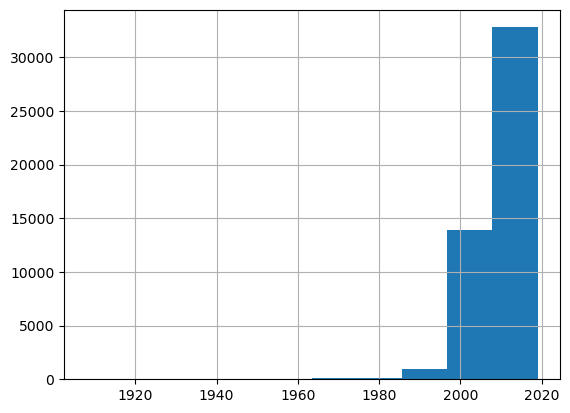

In [9]:
data['model_year'].hist()

In [10]:
model_table = data.pivot_table(index='condition', values='model_year', aggfunc='median')
model_table

,model_year
condition,
excellent,2012.0
fair,2003.0
good,2009.0
like new,2014.0
new,2018.0
salvage,2005.0


In [11]:
def fill_model_year(row):
    model_year = row['model_year']
    condition = row['condition']
    
    if pd.isna(model_year):
        return model_table['model_year'][condition]
    return row['model_year']

In [12]:
data['model_year'] = data.apply(fill_model_year, axis=1)

In [13]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2009.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


### Valores ausentes em cylinders

In [14]:
data['cylinders'].describe()

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

<AxesSubplot:>

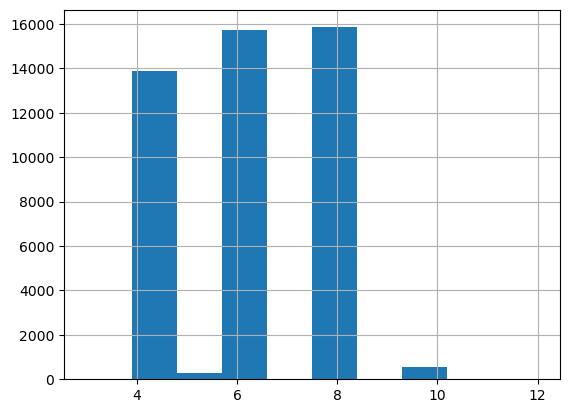

In [15]:
data['cylinders'].hist()  

In [16]:
data_mean = data['cylinders'].mean()
print(data_mean)

6.125235058899817


In [17]:
data_median = data['cylinders'].median()
print(data_mean)

6.125235058899817


In [18]:
data['cylinders'] = data['cylinders'].fillna(data_mean)
print(data.head(10))

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good   6.000000  gas  145000.0   
1  25500      2009.0      ford f-150       good   6.000000  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new   4.000000  gas  110000.0   
3   1500      2003.0      ford f-150       fair   8.000000  gas       NaN   
4  14900      2017.0    chrysler 200  excellent   4.000000  gas   80903.0   
5  14990      2014.0    chrysler 300  excellent   6.000000  gas   57954.0   
6  12990      2015.0    toyota camry  excellent   4.000000  gas   79212.0   
7  15990      2013.0     honda pilot  excellent   6.000000  gas  109473.0   
8  11500      2012.0     kia sorento  excellent   4.000000  gas  104174.0   
9   9200      2008.0     honda pilot  excellent   6.125235  gas  147191.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automat

### Valores ausentes paint_color

In [19]:
data['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [20]:
data['paint_color'].fillna('unknow', inplace=True)
data['paint_color'].unique()

array(['unknow', 'white', 'red', 'black', 'blue', 'grey', 'silver',
       'custom', 'orange', 'yellow', 'brown', 'green', 'purple'],
      dtype=object)

### Valores ausentes is_4wd

In [21]:
data['is_4wd'].unique()

array([ 1., nan])

In [22]:
data['is_4wd'].fillna(0, inplace=True)
data['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

### Valores ausentes em odometer 

In [23]:
data['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [24]:
data.groupby('condition')['odometer'].median()

condition
excellent    104230.0
fair         181613.0
good         129000.0
like new      72982.5
new            8002.0
salvage      142673.5
Name: odometer, dtype: float64

In [25]:
data_odom_table = data.pivot_table(index='condition', values='odometer', aggfunc='median')
data_odom_table

,odometer
condition,
excellent,104230.0
fair,181613.0
good,129000.0
like new,72982.5
new,8002.0
salvage,142673.5


In [26]:
def fill_odom(row):
    odometer = row['odometer']
    condition = row['condition']
    
    if pd.isna(odometer):
        return data_odom_table['odometer'][condition]
    return row['odometer']
  

In [27]:
data['odometer'] = data.apply(fill_odom, axis=1)

In [28]:
print(data.isna().sum())

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64


Resumidamente os dados ausentes foram tratados da seguinte forma: 
- Em model_year preenchemos os valores ausentes utilizando uma função para calcular as medianas com base no parametro condition; 
- Em cylinders checamos a media e preenchemos os valores ausentes com os valores encontrados; 
- Em paint_color apenas preenchemos os valores NAN por unknow; 
- Em is_4wd substituimos os valores ausentes NAN por 0;
- Em odometer preenchemos os valores ausentes utilizando uma função para calcular as medianas com base no parametro condition.

## Corrigindo os dados

In [29]:
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


## Enriqueça os dados

Visando facilitar a análise, adicionaremos alguns fatores aos dados, os quais serão:

- Dia da semana, mês e ano em que a propaganda foi postada.
- Idade do veículo no momento em que a propaganda foi postada.
- Média de quilômetros percorridos por ano.

In [30]:


data['day_ad'] = data['date_posted'].dt.day

data['month_ad'] = data['date_posted'].dt.month

data['year_ad'] = data['date_posted'].dt.year

data.head()



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_ad,month_ad,year_ad
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknow,1.0,2018-06-23,19,23,6,2018
1,25500,2009.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,19,10,2018
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,7,2,2019
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknow,0.0,2019-03-22,9,22,3,2019
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2,4,2019


In [31]:


data['age_car'] = data['year_ad'] - data['model_year']

data.head()               

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_ad,month_ad,year_ad,age_car
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknow,1.0,2018-06-23,19,23,6,2018,7.0
1,25500,2009.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,19,10,2018,9.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,7,2,2019,6.0
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknow,0.0,2019-03-22,9,22,3,2019,16.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2,4,2019,2.0


In [32]:


data['km_media'] = data['odometer'] / data['age_car'].where(data['age_car'] != 0, 1)
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_ad,month_ad,year_ad,age_car,km_media
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknow,1.0,2018-06-23,19,23,6,2018,7.0,20714.285714
1,25500,2009.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,19,10,2018,9.0,9856.111111
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,7,2,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknow,0.0,2019-03-22,9,22,3,2019,16.0,11350.812500
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2,4,2019,2.0,40451.500000


In [33]:

data['condition'].unique()


array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [34]:
{'new': 5, 'like new': 4, 'excellent':3, 'good':2, 'fair':1, 'salvage':0}

{'new': 5, 'like new': 4, 'excellent': 3, 'good': 2, 'fair': 1, 'salvage': 0}

In [35]:
dict_cond = {'new': 5, 'like new': 4, 'excellent':3, 'good':2, 'fair':1, 'salvage':0}

def cond(row):
    return dict_cond[row]

data['new_condition'] = data['condition'].apply(cond)

In [36]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_ad,month_ad,year_ad,age_car,km_media,new_condition
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknow,1.0,2018-06-23,19,23,6,2018,7.0,20714.285714,2
1,25500,2009.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,19,10,2018,9.0,9856.111111,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,7,2,2019,6.0,18333.333333,4
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknow,0.0,2019-03-22,9,22,3,2019,16.0,11350.812500,1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2,4,2019,2.0,40451.500000,3


## Verificando os dados limpos

In [37]:


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   price          51525 non-null  int64         
 1   model_year     51525 non-null  float64       
 2   model          51525 non-null  object        
 3   condition      51525 non-null  object        
 4   cylinders      51525 non-null  float64       
 5   fuel           51525 non-null  object        
 6   odometer       51525 non-null  float64       
 7   transmission   51525 non-null  object        
 8   type           51525 non-null  object        
 9   paint_color    51525 non-null  object        
 10  is_4wd         51525 non-null  float64       
 11  date_posted    51525 non-null  datetime64[ns]
 12  days_listed    51525 non-null  int64         
 13  day_ad         51525 non-null  int64         
 14  month_ad       51525 non-null  int64         
 15  year_ad        5152

In [38]:


data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,day_ad,month_ad,year_ad,age_car,km_media,new_condition
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.816419,6.125235,115199.014508,0.496303,39.55476,15.449491,6.628491,2018.307462,8.491043,18931.848574,2.637535
std,10040.803015,6.091605,1.573327,60484.863376,0.499991,28.20427,8.736521,3.474134,0.461447,6.105618,16241.726320,0.712447
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.00000,1.000000,1.000000,2018.000000,0.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,75668.000000,0.000000,19.00000,8.000000,3.000000,2018.000000,4.000000,10440.500000,2.000000
50%,9000.000000,2011.000000,6.000000,110908.000000,0.000000,33.00000,15.000000,7.000000,2018.000000,7.000000,15000.000000,3.000000
75%,16839.000000,2014.000000,8.000000,147821.000000,1.000000,53.00000,23.000000,10.000000,2019.000000,12.000000,21772.333333,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.00000,31.000000,12.000000,2019.000000,110.000000,373200.000000,5.000000


## Estudando os parâmetros fundamentais

Os parâmetros fundamentais são:

- Preço
- A idade do veículo quando a propaganda foi colocada
- Quilometragem
- Número de cilindros
- Condição

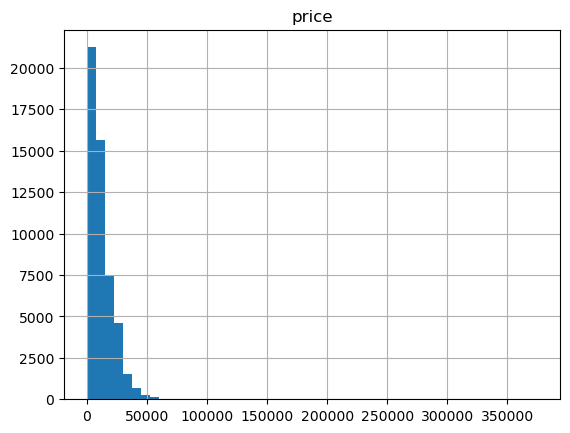

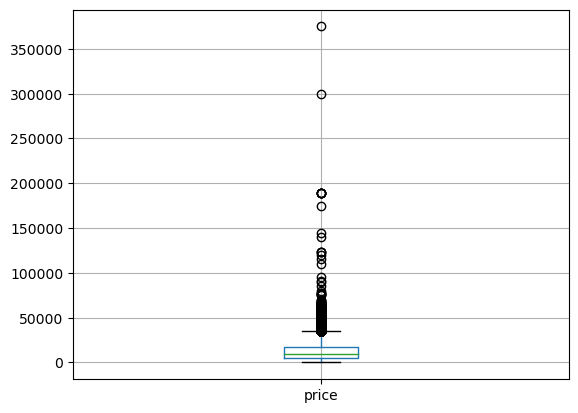

In [39]:
data.hist('price', bins=50)
plt.show()
data.boxplot(column=['price'])
plt.show()

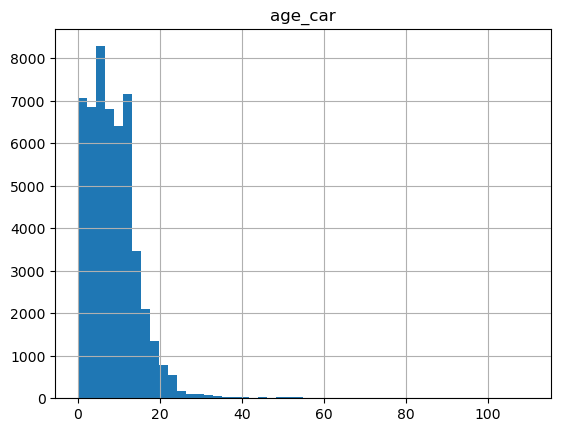

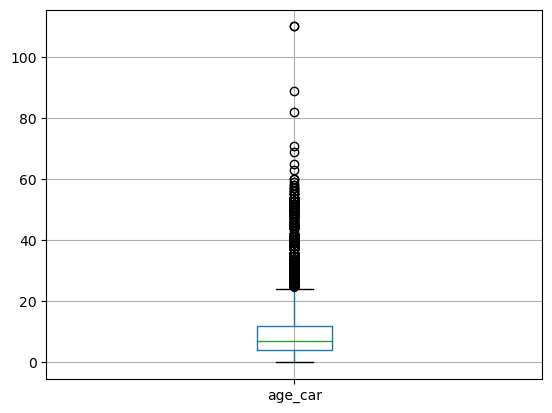

In [40]:
data.hist('age_car', bins=50)
plt.show()
data.boxplot(column=['age_car'])
plt.show()

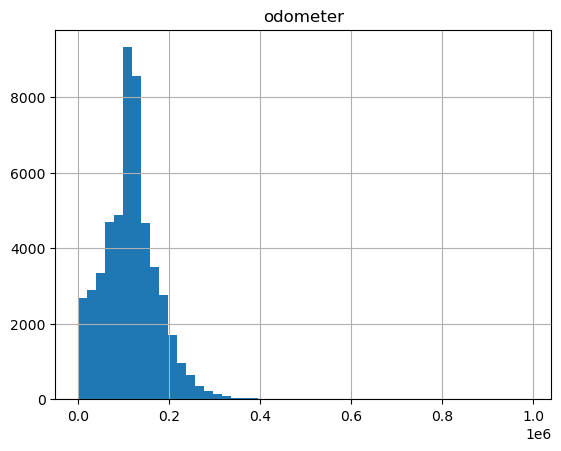

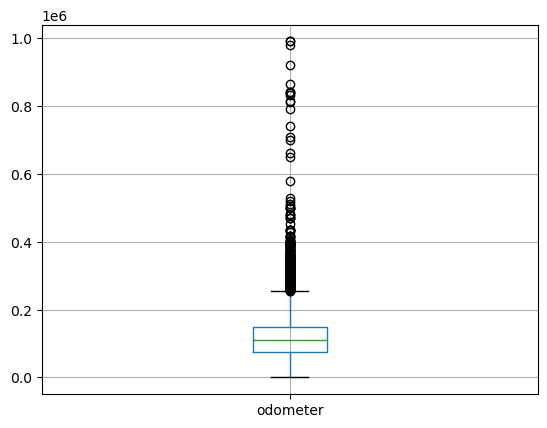

In [41]:
data.hist('odometer', bins=50)
plt.show()
data.boxplot(column=['odometer'])
plt.show()


array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

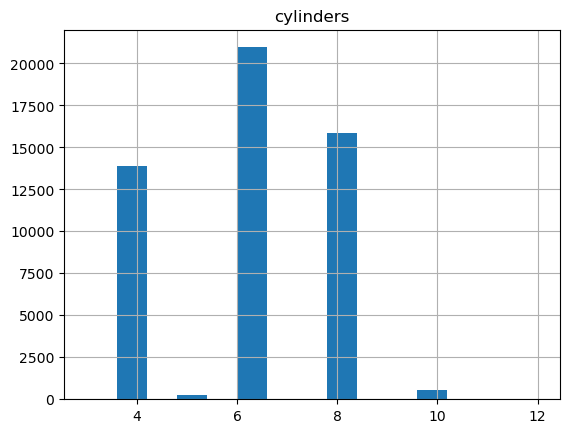

In [42]:
data.hist('cylinders', bins=15)

array([[<AxesSubplot:title={'center':'new_condition'}>]], dtype=object)

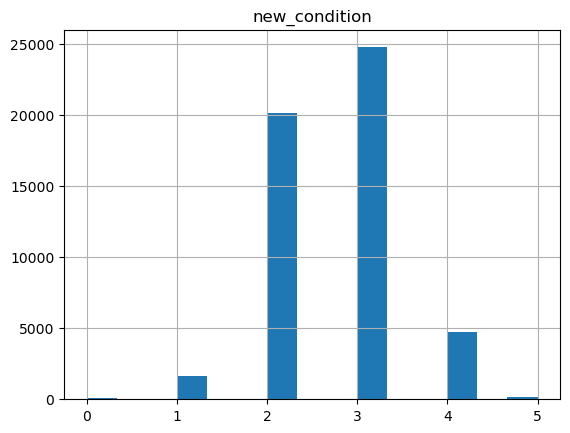

In [43]:
data.hist('new_condition', bins=15)

## Estude e cuide dos valores ausentes

Dado os resultados acima, determinaremos quais colunas devem conter valores atípicos, e criaremos um DataFrame sem aqueles valores atípicos. Para identificar os valores atípicos iremos definir os limites inferior/superior para intervalos normais de valores.

In [44]:
IQR_price = data['price'].quantile(0.75) - data['price'].quantile(0.25)
IQR_age_car = data['age_car'].quantile(0.75) - data['age_car'].quantile(0.25)
IQR_odom = data['odometer'].quantile(0.75) - data['odometer'].quantile(0.25)

In [45]:
# Determine o limite inferior para valores atípicos
price_inf = data['price'].quantile(0.25)-1.5*IQR_price
age_car_inf = data['age_car'].quantile(0.25)-1.5*IQR_age_car
odom_inf = data['odometer'].quantile(0.25)-1.5*IQR_odom

In [46]:
# Determine o limite superior para valores atípicos
price_sup = data['price'].quantile(0.75)+1.5*IQR_price
age_car_sup = data['age_car'].quantile(0.75)+1.5*IQR_age_car
odom_sup = data['odometer'].quantile(0.75)+1.5*IQR_odom

In [47]:
# Armazene os dados sem os valores atípicos em um DataFrame separado
car_total = data.query('(price < @price_sup) and (age_car < @age_car_sup) and (odometer < @odom_sup)')

car_total.describe()


,price,model_year,cylinders,odometer,is_4wd,days_listed,day_ad,month_ad,year_ad,age_car,km_media,new_condition
count,48149.000000,48149.000000,48149.000000,48149.000000,48149.000000,48149.000000,48149.000000,48149.000000,48149.000000,48149.000000,48149.000000,48149.000000
mean,11255.842281,2010.150117,6.061632,113626.888232,0.485161,39.538827,15.453239,6.633783,2018.306507,8.156390,18734.448379,2.637666
std,7829.979364,4.957862,1.573383,53103.585138,0.499785,28.209627,8.740879,3.472538,0.461048,4.971482,15371.843808,0.697506
min,1.000000,1995.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2018.000000,0.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,78600.000000,0.000000,19.000000,8.000000,3.000000,2018.000000,4.000000,10600.000000,2.000000
50%,8995.000000,2011.000000,6.000000,111833.000000,0.000000,33.000000,15.000000,7.000000,2018.000000,7.000000,14910.615385,3.000000
75%,15995.000000,2014.000000,8.000000,146000.000000,1.000000,53.000000,23.000000,10.000000,2019.000000,11.000000,21528.000000,3.000000
max,34595.000000,2019.000000,12.000000,256000.000000,1.000000,271.000000,31.000000,12.000000,2019.000000,23.000000,195700.000000,5.000000


## Estudando os parâmetros fundamentais sem valores atípicos

Usando os dados filtrados para fazer novos gráficos iremos comparar com os anteriores - que incluem os valores atípicos e tiraremos as conclusões para cada um.

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

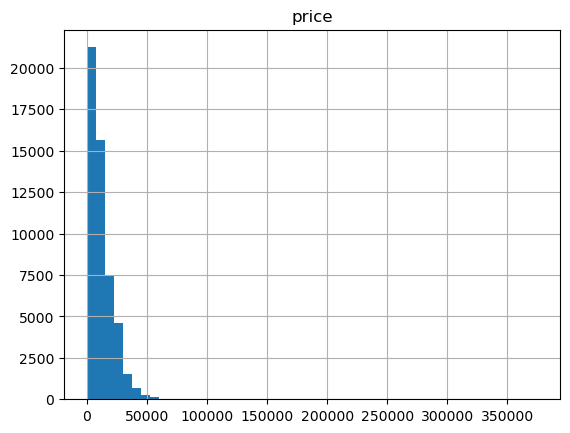

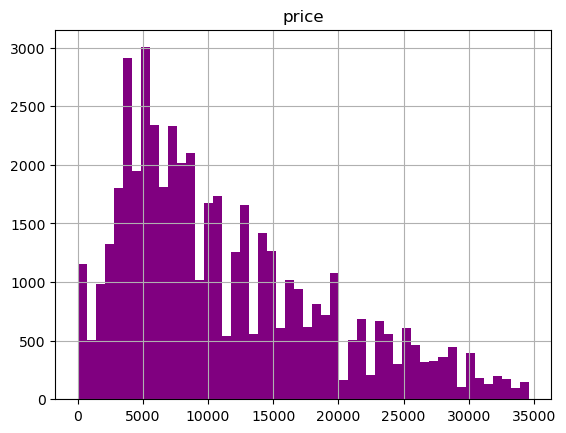

In [48]:
data.hist('price', bins=50)
car_total.hist('price', bins=50, color='purple')

array([[<AxesSubplot:title={'center':'age_car'}>]], dtype=object)

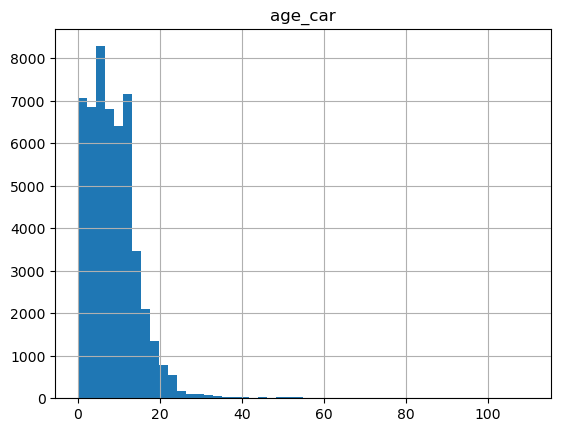

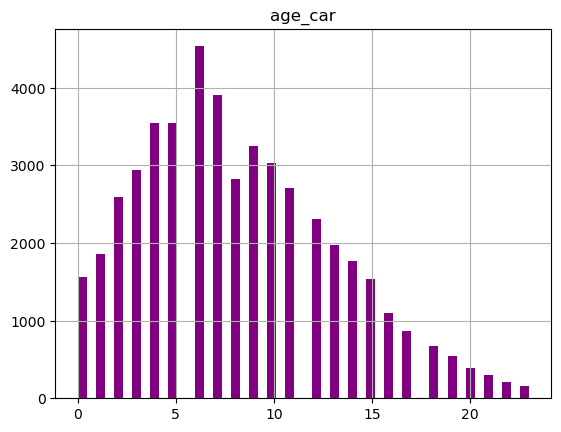

In [49]:
data.hist('age_car', bins=50)
car_total.hist('age_car', bins=50, color='purple')

array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

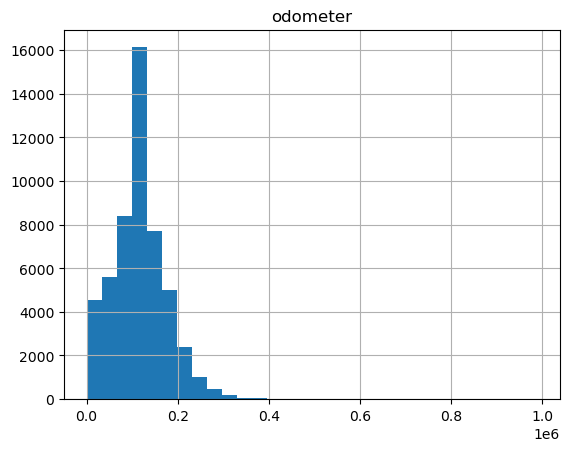

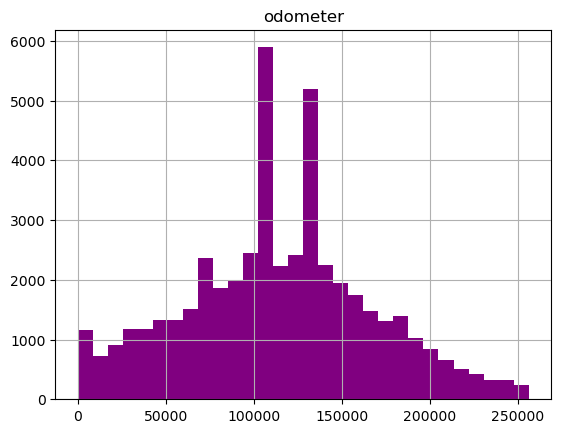

In [50]:
data.hist('odometer', bins=30)
car_total.hist('odometer', bins=30, color='purple')

Com os novos gráficos e sem mais os valores atípicos nas referidas colunas, pudemos concluir que:

- O preço máximo dos veículos seria $34.595.
- A idade dos veículos estaria entre 0 e 23 anos.
- O odômetro dos veículos estaria entre 0 e 25.600.
 

## Tempo de vida das propagandas

Estudaremos quantos dias de propagandas foram exibidas (`days_listed`). Calcularemos a média e a mediana. Descreveremos o tempo de vida útil comum de uma propaganda. Determinaremos quando as propagandas foram removidas rapidamente, e quando elas foram listadas por um tempo anormalmente longo.

In [51]:
data['days_listed'].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

Utilizamos o método describe para encontrar a média e a mediana e, assim, pudemos verificar o tempo de vida útil comum de uma propaganda. Observamos que o tempo médio seria por volta de 39 dias e o tempo mediano por volta de 33. Portanto, propagandas que estiveram presentes por menos de 39 dias teriam ficado disponíveis por menos do que o tempo médio, tendo sido removidas rapidamente. Dessa forma, aquelas propagandas que ficaram por mais de 39 dias teriam ultrapassado o tempo médio e teriam sido listadas por um tempo anormalmente longo. Também podemos citar que houve um veículo que foi listado por apenas 19 dias, ou seja, foi retirado rapidamente, enquanto outro foi listado por 271 dias, sendo assim listado por um tempo demasiadamente longo.

## Média de preços por cada tipo de veículo

Analisaremos o número de propagandas e o preço médio para cada tipo de veículo. Construiremos um gráfico mostrando a dependência do número de propagandas em relação ao tipo de veículo. Selecionaremos os dois tipos com os maiores números de propagandas.

In [52]:
data['type'].unique()

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

In [53]:
type_price = data.pivot_table(index='type', values='price', aggfunc=['count','mean'])
type_price.reset_index().sort_values(by=('count', 'price'), ascending=False)

,type,count,mean
,,price,price
0,SUV,12405,11149.400000
10,truck,12353,16734.894924
9,sedan,12154,6965.358647
8,pickup,6988,16057.410418
3,coupe,2303,14353.442901
12,wagon,1541,9088.134328
5,mini-van,1161,8193.177433
4,hatchback,1047,6868.513849
11,van,633,10546.941548


Text(0.5, 1.0, 'Número de propagandas por tipo de veículo')

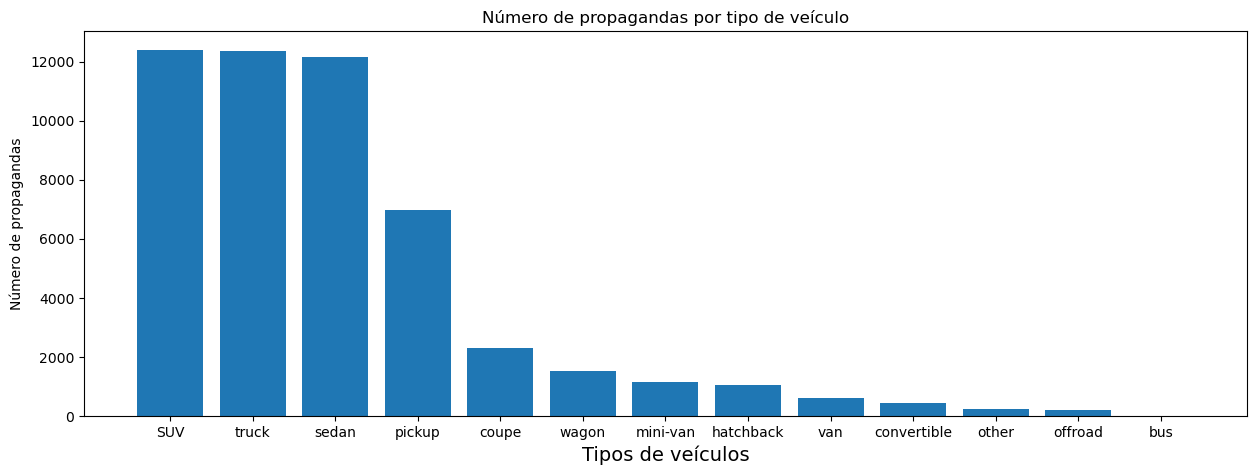

In [54]:
num_propagandas = [12405, 12353, 12154, 6988, 2303, 1541, 1161, 1047, 633, 446, 256, 214, 24]
tipos_veiculos = ['SUV', 'truck', 'sedan', 'pickup', 'coupe', 'wagon', 'mini-van', 'hatchback','van', 
       'convertible', 'other', 'offroad', 'bus']

fig=plt.figure(figsize=(15,5))
plt.bar(tipos_veiculos, num_propagandas)


plt.xlabel('Tipos de veículos', fontsize=14)
plt.ylabel('Número de propagandas')
plt.title('Número de propagandas por tipo de veículo')

In [55]:
type_suv = data.query('type in "SUV"')
print(type_suv.head(10))

    price  model_year               model  condition  cylinders fuel  \
0    9400      2011.0              bmw x5       good   6.000000  gas   
7   15990      2013.0         honda pilot  excellent   6.000000  gas   
8   11500      2012.0         kia sorento  excellent   4.000000  gas   
9    9200      2008.0         honda pilot  excellent   6.125235  gas   
14  12990      2009.0           gmc yukon  excellent   8.000000  gas   
17  13990      2014.0       jeep cherokee  excellent   6.000000  gas   
18  12500      2013.0  chevrolet traverse  excellent   6.000000  gas   
20   6990      2012.0     chevrolet tahoe  excellent   8.000000  gas   
21   5250      2007.0         toyota rav4       good   6.000000  gas   
23   7500      2004.0       jeep wrangler       good   6.000000  gas   

    odometer transmission type paint_color  is_4wd date_posted  days_listed  \
0   145000.0    automatic  SUV      unknow     1.0  2018-06-23           19   
7   109473.0    automatic  SUV       black     1.

In [56]:
type_truck = data.query('type in "truck"')
print(type_truck.head(10))

    price  model_year                       model  condition  cylinders fuel  \
22   7500      2004.0         chevrolet silverado   like new        8.0  gas   
39   8000      2009.0                  ford f-150       good        8.0  gas   
50   6200      2006.0                  ford f-150  excellent        6.0  gas   
53  10400      2012.0          chevrolet colorado  excellent        5.0  gas   
60  13000      2005.0                    ram 1500       good        8.0  gas   
61  16999      2013.0    chevrolet silverado 1500       good        8.0  gas   
66  14999      2013.0  chevrolet silverado 3500hd       good        8.0  gas   
67  14950      2012.0                    ram 1500  excellent        8.0  gas   
69   7800      2014.0                  ford f-150   like new        8.0  gas   
79  16500      2012.0               ford f-250 sd       good        8.0  gas   

    odometer transmission   type paint_color  is_4wd date_posted  days_listed  \
22  180000.0    automatic  truck      

Verificamos a média de preço por cada tipo de veículo e conseguimos, com a ajuda do gráfico construído, ver claramente quais foram os veículos que mais tiveram propagandas, bem como a média de preço dos mesmos. Constatamos que os dois veículos que mais tiveram propagandas foram SUV e Truck.

## Fatores de preço

Para determinar quais fatores impactam mais o preço dos veículos, vamos focar nos tipos populares identificados anteriormente (SUV e Truck) e investigar como o preço depende de diferentes variáveis, como idade, quilometragem, condição, tipo de transmissão e cor. 

Essas análises ajudarão a entender melhor quais fatores são mais relevantes na determinação do preço dos veículos e permitirão uma visão mais detalhada sobre como diferentes características influenciam o valor dos veículos listados no site.

<AxesSubplot:xlabel='age_car', ylabel='price'>

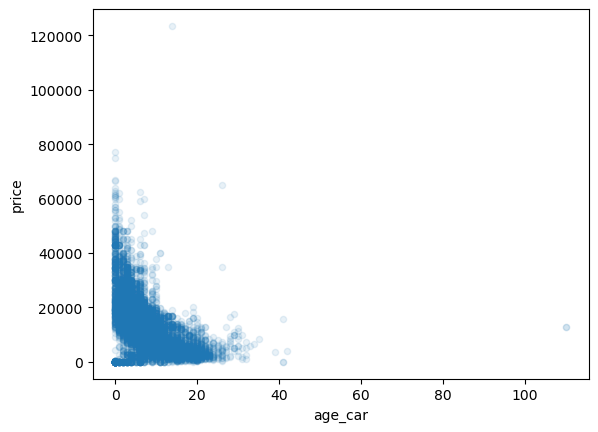

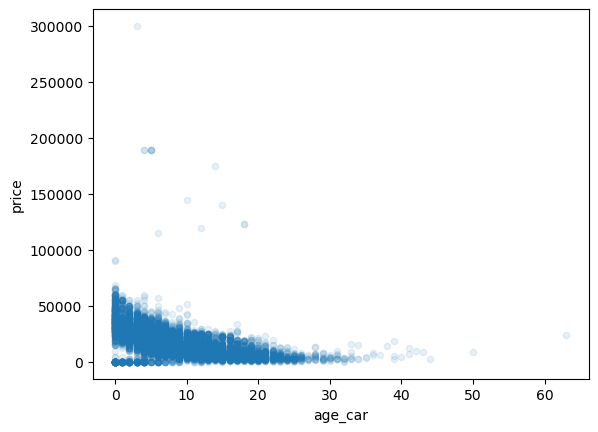

In [57]:
type_suv.plot(y='price',x='age_car',kind='scatter',alpha=0.1)
type_truck.plot(y='price',x='age_car',kind='scatter',alpha=0.1)



<AxesSubplot:xlabel='condition', ylabel='price'>

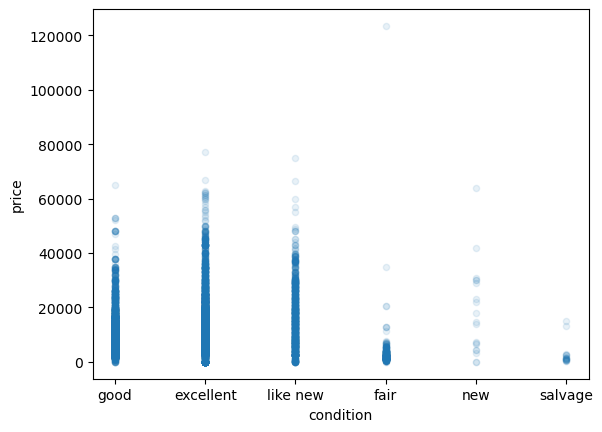

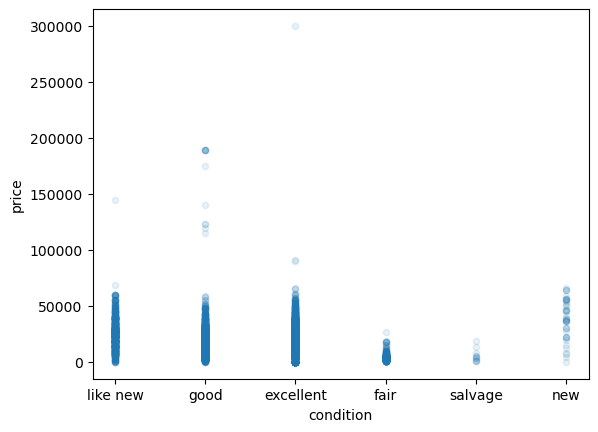

In [58]:
type_suv.plot(y='price',x='condition',kind='scatter',alpha=0.1)
type_truck.plot(y='price',x='condition',kind='scatter',alpha=0.1)

<AxesSubplot:xlabel='odometer', ylabel='price'>

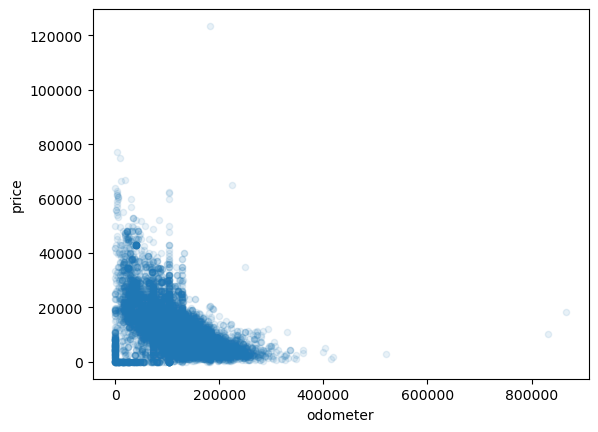

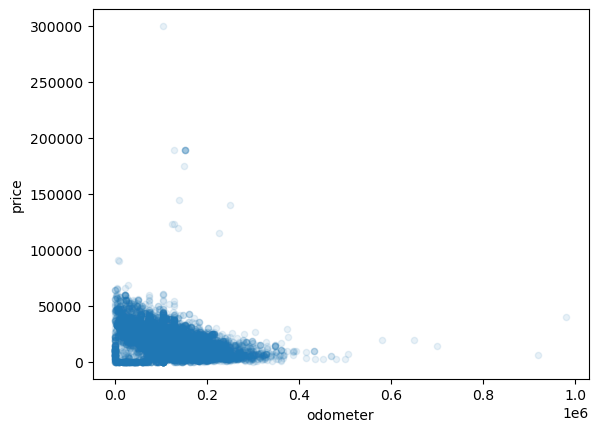

In [59]:
type_suv.plot(y='price',x='odometer',kind='scatter',alpha=0.1)
type_truck.plot(y='price',x='odometer',kind='scatter',alpha=0.1)

<AxesSubplot:title={'center':'price'}, xlabel='transmission'>

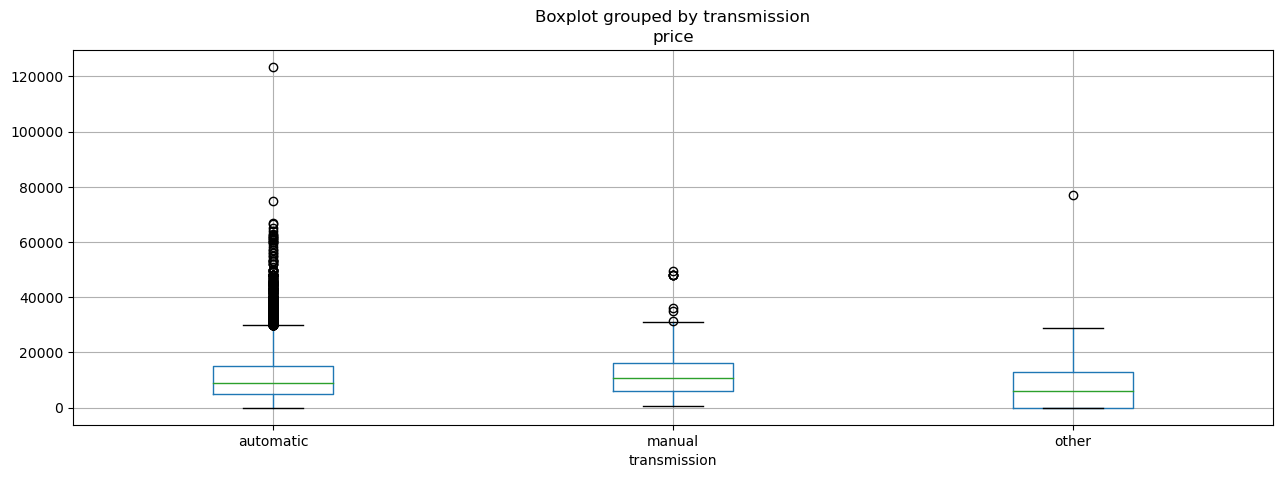

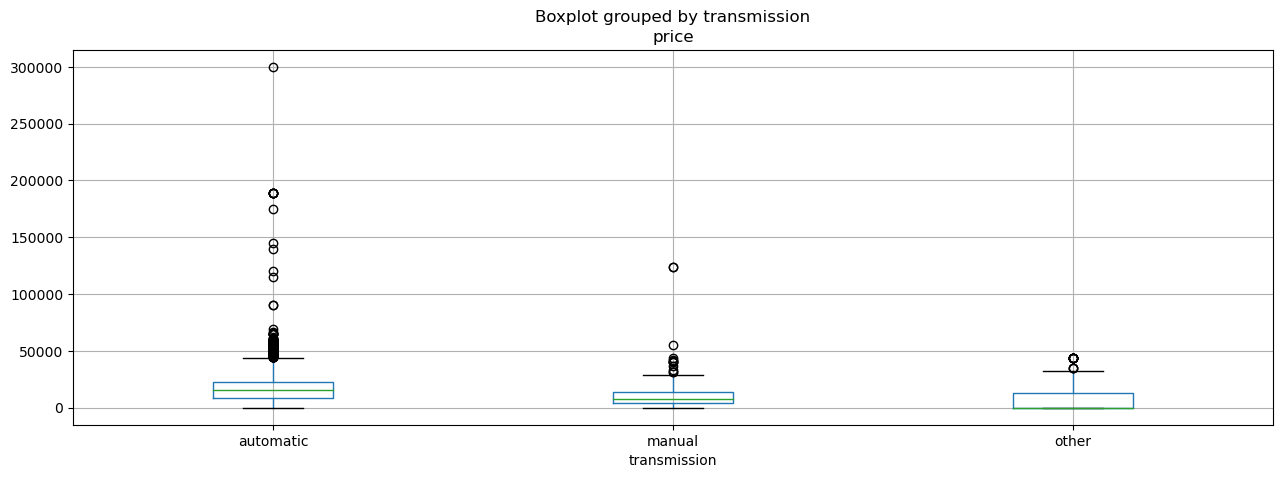

In [60]:
type_suv.boxplot('price',by='transmission',figsize=(15,5))
type_truck.boxplot('price',by='transmission',figsize=(15,5))

<AxesSubplot:title={'center':'price'}, xlabel='paint_color'>

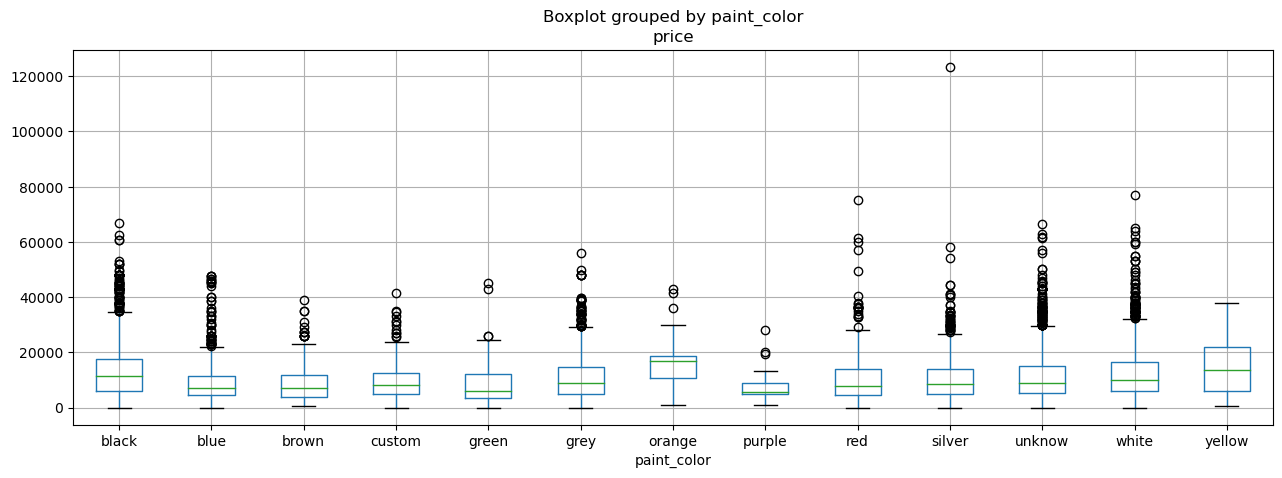

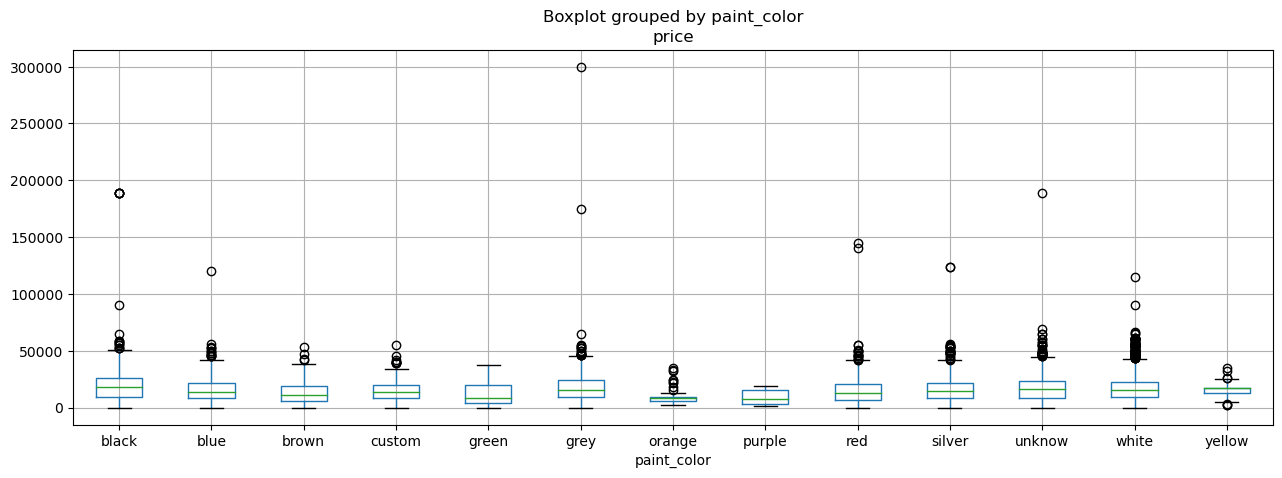

In [61]:
type_suv.boxplot('price',by='paint_color',figsize=(15,5))
type_truck.boxplot('price',by='paint_color',figsize=(15,5))

Com os dois tipos de veículos com mais propagandas - SUV e truck - podemos concluir que os fatores que mais influenciam o preço do veículo são:

- a idade do veículo: já que quanto mais novo, mais alto é o preço;
- a condição: com condição 3-excellent e 2-good, o preço tende a ser melhor;
- o odômetro: quanto menos quilômetros, o veículo acaba tendo um preço mais alto;
- a transmissão: veículos com transmissão automática podem influenciar no preço;
- a cor do veículo: entendemos que a cor do automóvel pode não ser necessariamente um fator que impacta no preço.

## Conclusão geral


Para o presente estudo, iniciamos com a verificação do conjunto de dados. Observamos inicialmente a existência de 13 colunas e 51.525 linhas, o que nos levou a checar se havia linhas ausentes em alguma coluna. Identificamos a presença de valores ausentes nas colunas model_year, cylinders, odometer, paint_color, e is_4wd. Além disso, constatamos que a coluna date_posted possuía um dado do tipo objeto, o que não seria apropriado.

Com essas primeiras constatações, entendemos que a coluna is_4wd apresentava um número significativo de valores ausentes. No entanto, por se tratar de uma variável binária, decidimos que os valores ausentes poderiam ser substituídos por 0 (False). Já os dados ausentes nas demais colunas poderiam ter ocorrido devido a erros manuais no input dos dados.

Tratamos os dados ausentes da seguinte maneira:

- Na coluna model_year, preenchemos os valores ausentes utilizando uma função para calcular as medianas com base no parâmetro condition.
- Na coluna cylinders, checamos a média e preenchemos os valores ausentes com os valores encontrados.
- Na coluna paint_color, preenchemos os valores ausentes com "unknown".
- Na coluna is_4wd, substituímos os valores ausentes por 0.
- Na coluna odometer, preenchemos os valores ausentes utilizando uma função para calcular as medianas com base no parâmetro condition.

Além disso, corrigimos o dado da coluna date_posted para o formato date, garantindo que o dado estivesse adequado para a análise.

Para facilitar a análise, adicionamos alguns fatores aos dados, que foram:
- Dia da semana, mês e ano em que a propaganda foi postada;
- Idade do veículo no momento da postagem da propaganda;
- Média de quilômetros percorridos por ano.

Além disso, para ajudar em nossa análise, substituímos os valores de string da coluna condition por uma escala numérica.

Com os dados ausentes tratados e enriquecidos, começamos a estudar os parâmetros fundamentais para nossa análise. Como abordagem para estudar os seguintes parâmetros: preço, idade do veículo quando a propaganda foi colocada, quilometragem, número de cilindros e condição, utilizamos histogramas e boxplots.

Pudemos observar que os parâmetros de preço, idade do veículo quando a propaganda foi colocada, e quilometragem apresentavam outliers, os quais poderiam interferir na análise. Quanto aos demais parâmetros, não foram encontrados problemas, permitindo que pudéssemos concluir o seguinte:
- A maior quantidade de veículos nesse estudo possui 6, 8 ou 4 cilindros.
- A maior quantidade de veículos nesse estudo está nas condições 3 (excellent) e 2 (good).

Determinamos que as colunas price, age_car e odometer possuíam valores atípicos e criamos um DataFrame sem esses outliers, além de gerar novos gráficos. Com os gráficos atualizados e sem os valores atípicos nas colunas mencionadas, pudemos concluir que:

- O preço máximo dos veículos seria $34.595.
- A idade dos veículos estaria entre 0 a 23 anos.
- O odômetro dos veículos estaria entre 0 a 25.600 km.

Adiante, analisamos a coluna days_posted e verificamos que o tempo médio de vida útil das propagandas era de 39 dias. Com isso, determinamos se a propaganda permaneceu por um longo período ou foi removida rapidamente, com base no tempo médio em que ficou disponível.

Seguindo nossa análise, examinamos a média de preço por cada tipo de veículo e, com o auxílio de gráficos, conseguimos visualizar claramente quais veículos tiveram mais propagandas, bem como a média de preço dos mesmos. Constatamos que os dois veículos com maior número de propagandas foram SUVs e caminhonetes (trucks).

Utilizando os dados dos veículos do tipo SUV e truck, que foram os mais anunciados, analisamos se os fatores idade do veículo, quilometragem, condição, tipo de transmissão e cor influenciaram o preço desses veículos.

Concluímos que os fatores que mais influenciam o preço de um veículo são:

- Idade do veículo: Quanto mais velho o veículo, mais desvalorizado ele se torna.
- Condição: Veículos em condições 3 (excelente) e 2 (boa) tendem a ter preços melhores.
- Odômetro: Quanto menos quilômetros o veículo tem, mais alto o preço pode ser.
- Transmissão: Veículos com transmissão automática podem ter preços mais elevados.
- Cor do veículo: Constatamos que a cor do automóvel pode não ser um fator determinante no preço.

Resumidamente, o que realmente vende um veículo não é necessariamente sua cor, mas sim uma combinação de menor idade, menor quilometragem, excelente ou boa condição, e transmissão automática.

